## Customer Churn Analysis

## Objectives

* Our objective is to analyze customer behavior and demographic features (e.g., transaction activity, credit utilization, income, marital status) to identify key indicators that distinguish churned customers from retained ones.
* Explore how transaction volumes and frequencies (e.g., total transaction amounts, transaction counts) correlate with churn likelihood. Determine if lower transaction activity is a strong predictor of churn.
*  Assess the relationship between credit utilization rates (e.g., average utilization ratio) and churn risk. Identify if customers with higher credit utilization or irregular patterns in credit usage are more likely to churn.
* Investigate if anomalies exist in the financial behavior of churned customers, such as high credit balances but low transaction engagement, and their connection to churn.











---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [98]:
import os
current_dir = os.getcwd()
current_dir

'c:\\'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [99]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [100]:
current_dir = os.getcwd()
current_dir

'c:\\'

# Missing values and Data quality

Checking for any missing/null values and identifying any outliers in key financial metrics

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix


file_path = r"C:\Users\seebi\Downloads\archive (3)\Team1_Hackathon2\jupyter_notebooks\BankChurners.csv"
df = pd.read_csv(file_path)

df.head()  # Show first few rows

 # Load CSV


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [102]:
# Step 1: Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category     

In [103]:
# checking for duplicated values
df.duplicated().sum()

0

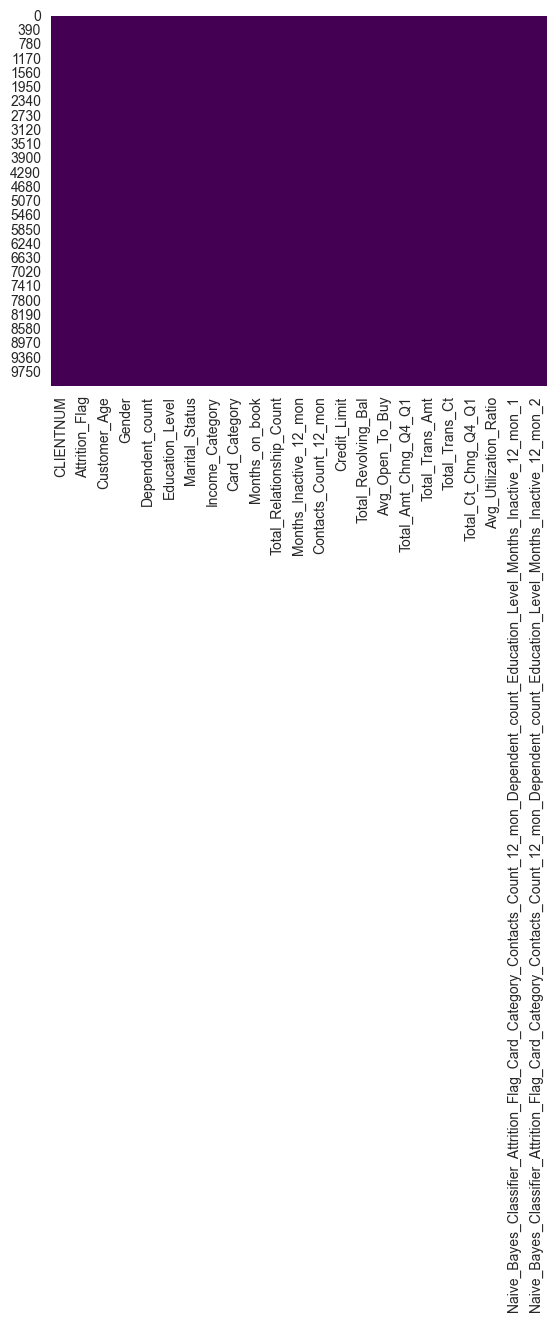

In [104]:
# Creating a heatmap to show that there is no missing data at all
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

# Data Visualisation

Analyzing distributions of income categories, education levels, and age groups, and seeing if or how different demographics correlate with churn

C:\Users\seebi\AppData\Local\Temp\ipykernel_10444\88974705.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




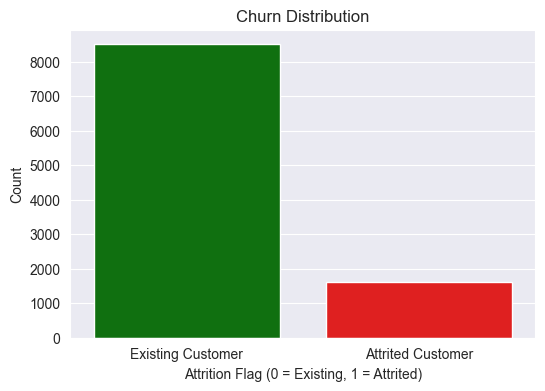

In [105]:
# Step 2: Churn Distribution to show the proportion of churned vs existing customers
plt.figure(figsize=(6, 4))
sns.countplot(x="Attrition_Flag", data=df, palette=["green", "red"])
plt.title("Churn Distribution")
plt.xlabel("Attrition Flag (0 = Existing, 1 = Attrited)")
plt.ylabel("Count")
plt.show()

This count plot shows that there is a significant imbalance within the dataset as most customers have retained (green), whereas a smaller portion have churned (red).

This can suggest that churn is relatively low but still needs further analysis; we chose a countplot in order to understand how many customers have been churned.

Whilst the churn is not alarming, a small percentage loss in customers can impact revenue.

This evidence partially supports our first hypotheses, but we need to investigate churned customers's spending further.

C:\Users\seebi\AppData\Local\Temp\ipykernel_10444\2715040024.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




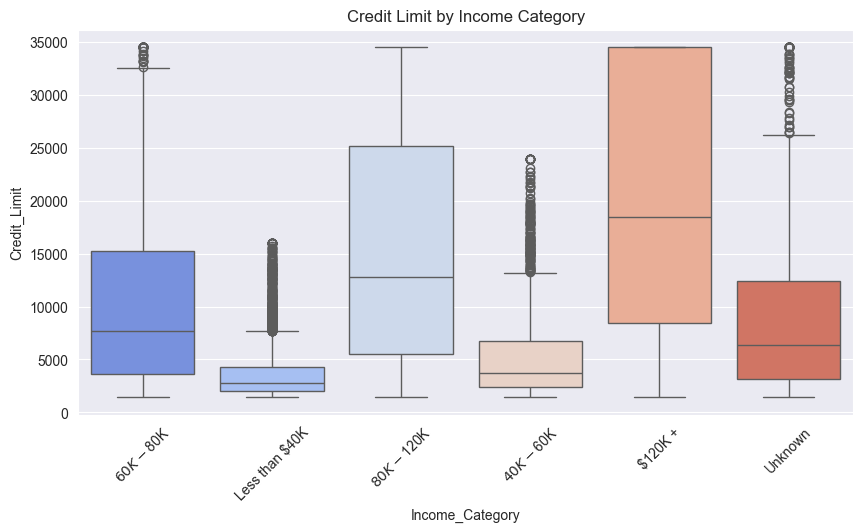

In [106]:
# Step 3: Boxplot - Credit Limit by Income Category in order to display variations in credit limits across all income groups
plt.figure(figsize=(10, 5))
sns.boxplot(x="Income_Category", y="Credit_Limit", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Credit Limit by Income Category")
plt.show()

This boxplot reveals that customers with 'higher income categories' generally have 'higher credit limits'. On the other hand, there are some outliers which can indicate that not all high income customers have high credit limits.

We can also see that some lower income customers have unusually high credit limits which could indicate risky lending practices.

We can infer that perhaps the lending criteria might have to be reviewed in order to ensure financial stability, as there are many outliers for people earning under $60,000; and we can also infer that customers in middle income categories could be targeted for credit limit increases.

The evidence supports our second hypotheses are proves it correct as income does influence credit limits but anomalies do exist.

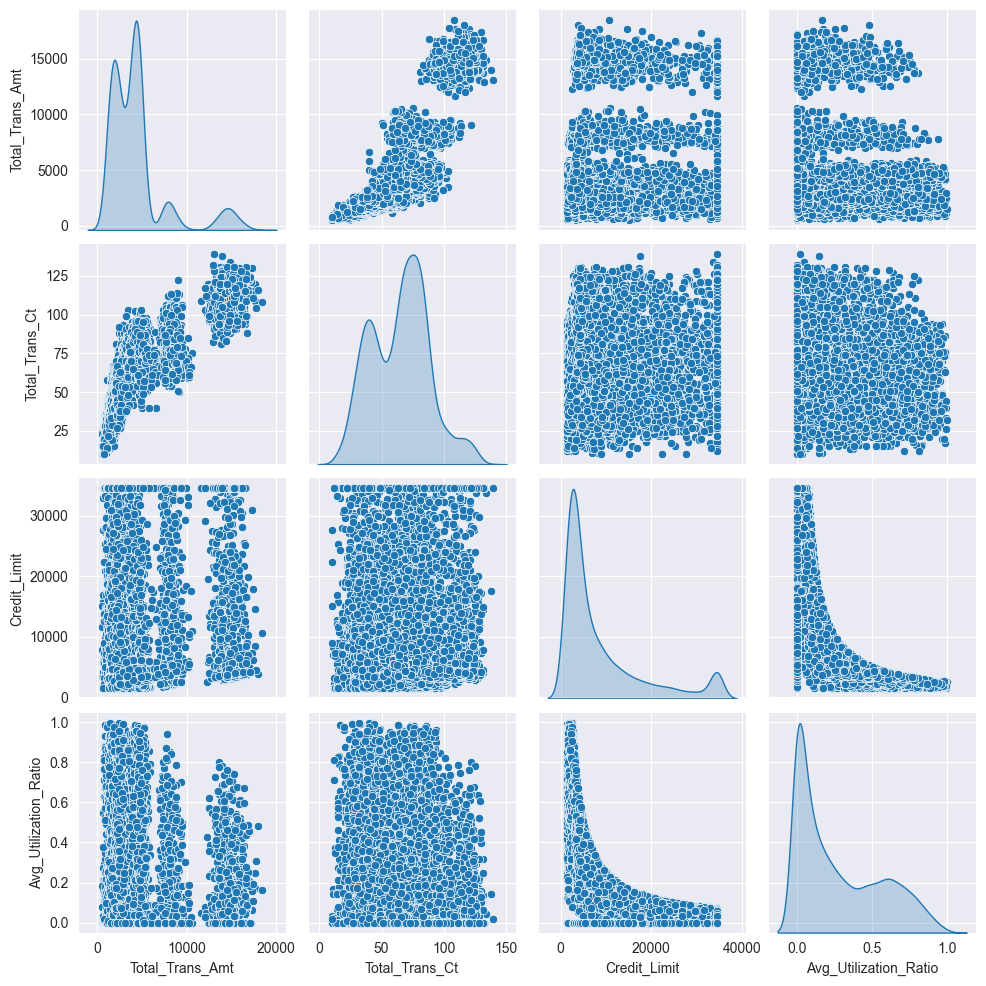

In [107]:
# Step 4: Pairplot for Financial Features to explore relationships between credit limit, utilisation, amount and transaction count
financial_features = ["Total_Trans_Amt", "Total_Trans_Ct", "Credit_Limit", "Avg_Utilization_Ratio"]
sns.pairplot(df[financial_features], diag_kind="kde")
plt.show()

There is a lot of strong correlation here specifically, 'total transactions' and 'total transaction amount' are closely linked which we can infer that customers who transact more tend to also spend more.

There is more strong correlation between 'credit limit' and 'utlization ratio' as they have an inverse relationship and we can infer from this information that higher credit limits often mean lower utilisation.

From this pairplot, we can infer that transaction frequency is a strong predictor of churn than credit limit, and an implication could be that customers who suddenly stop transacting could be at risk of churning.

The evidence presented here, also proves our third hypotheses correct, as low transaction activity does signal potential churn risk.

C:\Users\seebi\AppData\Local\Temp\ipykernel_10444\2320810007.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\seebi\AppData\Local\Temp\ipykernel_10444\2320810007.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




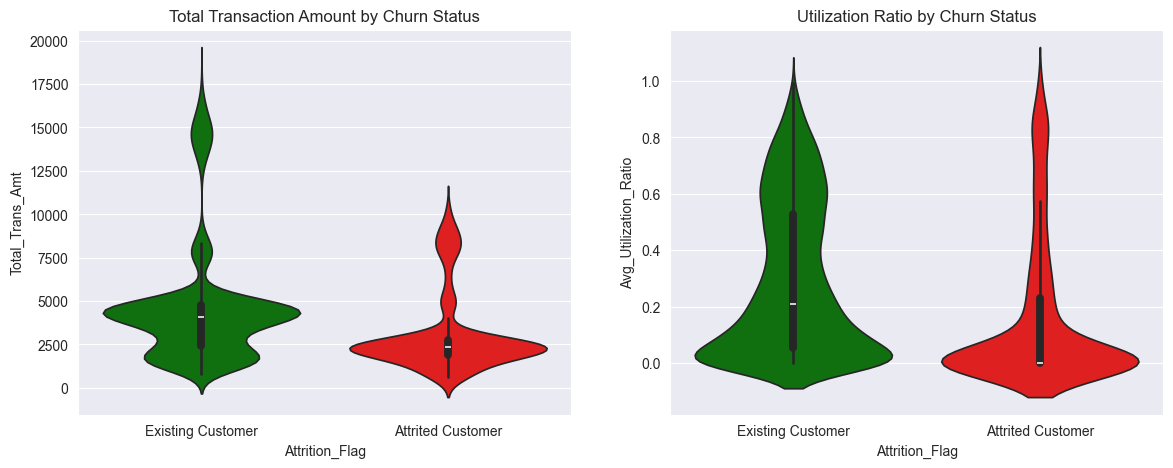

In [108]:
# Step 5: Violin Plot - Churn Impact on Transactions & Utilization so we can compare total transaction amounts and utilization ratios based on churn status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.violinplot(x="Attrition_Flag", y="Total_Trans_Amt", data=df, palette=["green", "red"], ax=axes[0])
axes[0].set_title("Total Transaction Amount by Churn Status")

sns.violinplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=df, palette=["green", "red"], ax=axes[1])
axes[1].set_title("Utilization Ratio by Churn Status")

plt.show()

From this we can see that churned customers tend to have lower transaction amounts which can suggest that lower engagement might predict churn.

We can also see that utlisation ratio is lower for churned customers and this is because the churned customers are not using their cards often.

Something to think about could be that customers who gradually decrease spending and decrease their credit usage could be flagged as at-risk customers. An improvement to this could be offering spending incentives such as cashback or reward points could encourage usage and retention.

The evidence above also proves our fourth hypotheses correct as churned customers show different behavioural patterns in spending and utilisation.

# Advanced visualisation for Predictive analysis

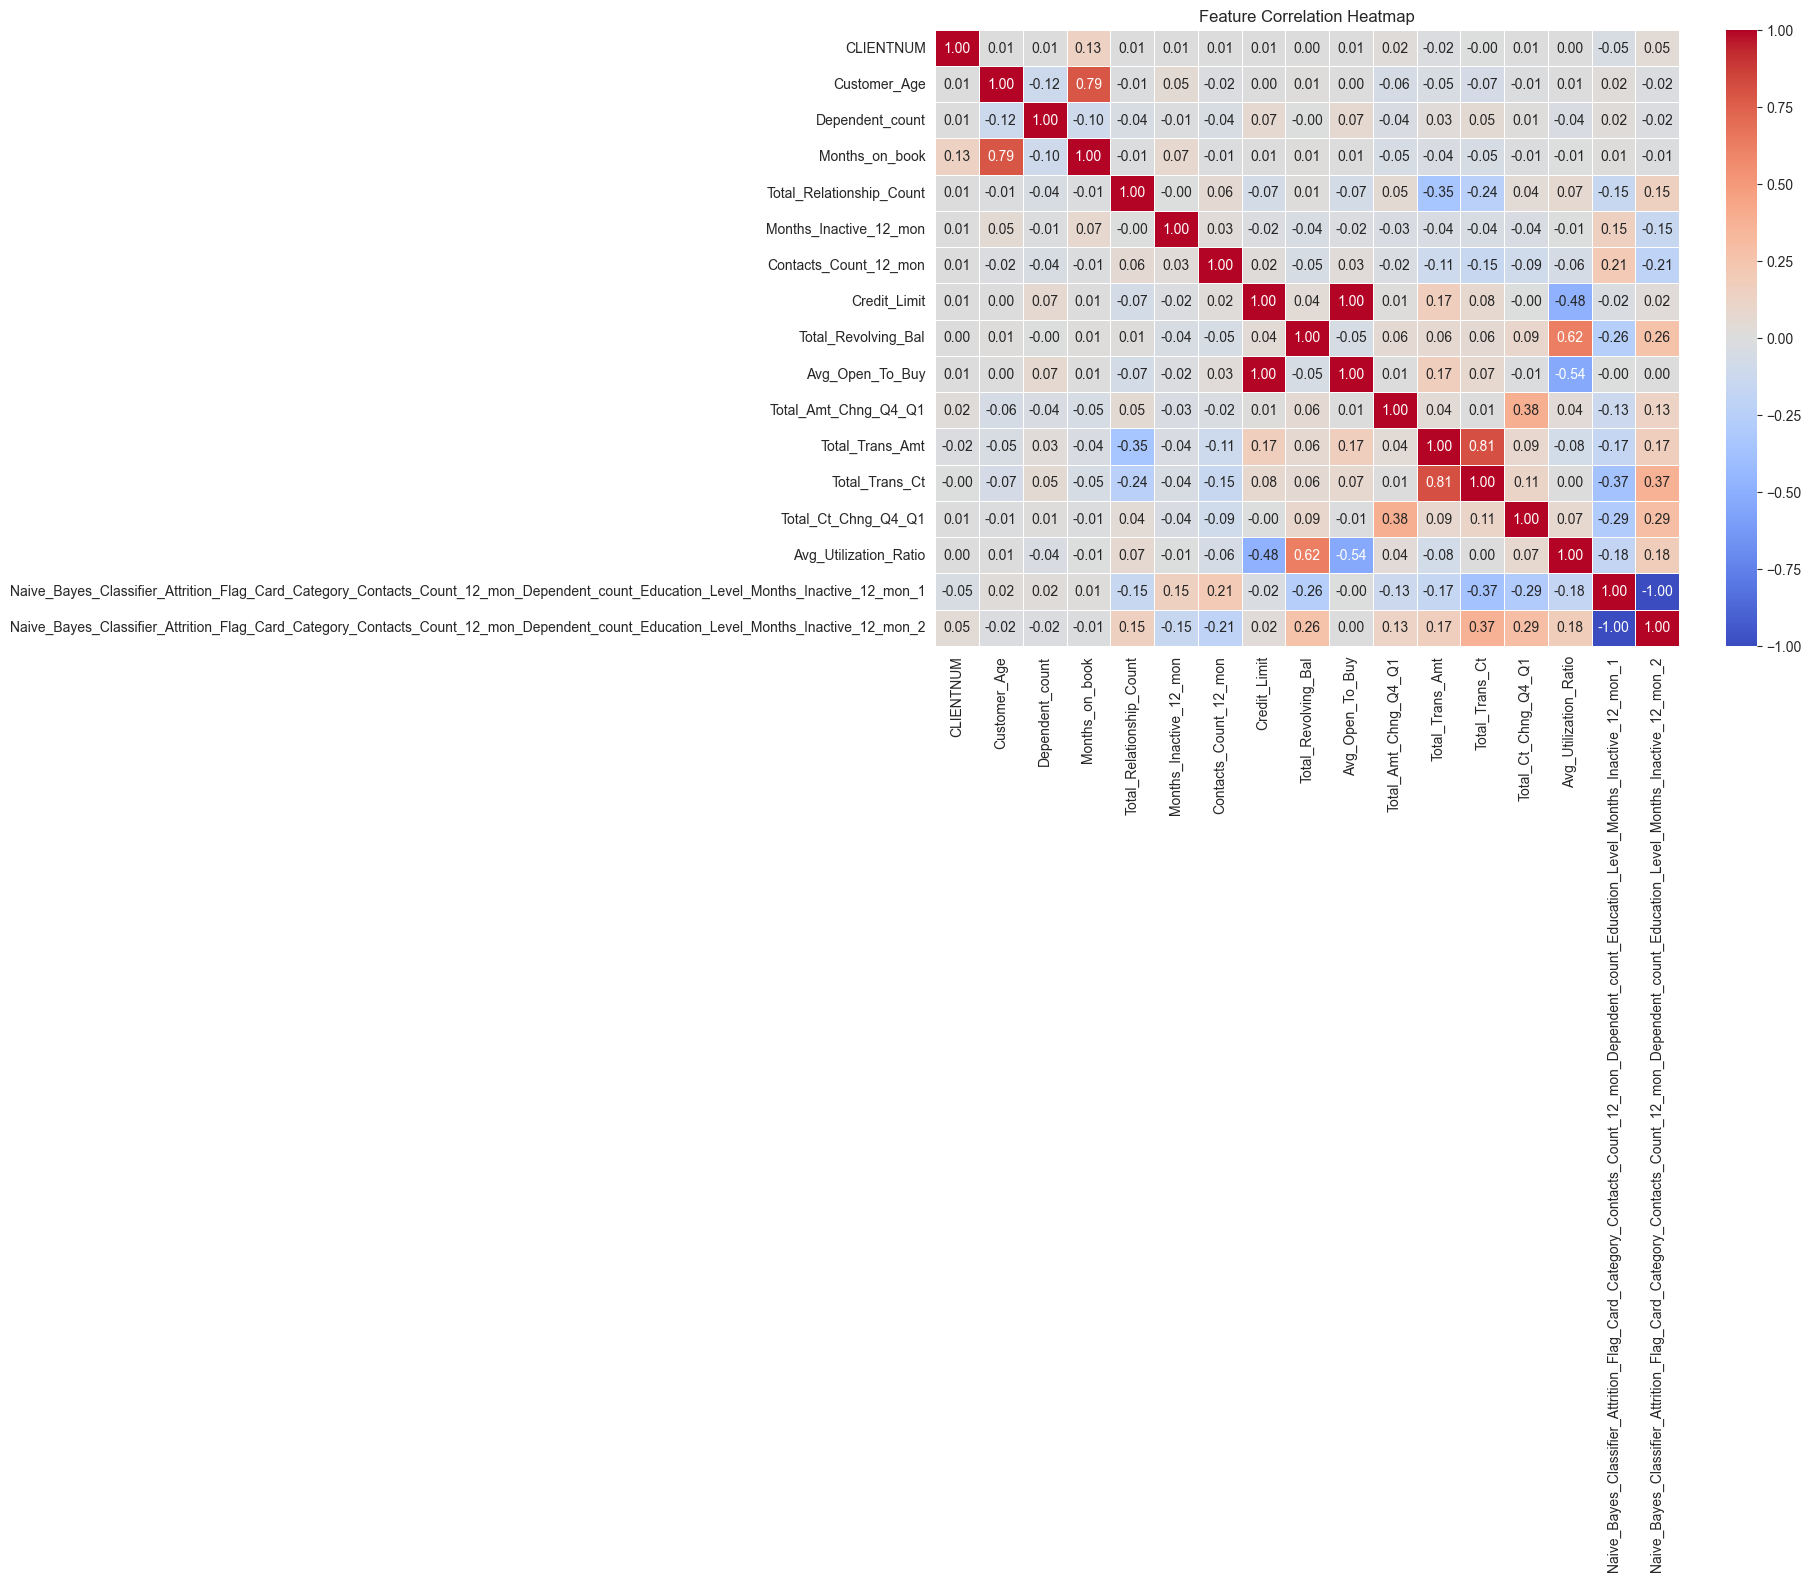

In [109]:
# Step 6: Correlation Heatmap to reveal connections between features
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

With this heatmap, we can infer that 'months on book' and 'customer age' have a strong correlation as older customers tend to stay with the bank longer.

We can also see that 'total revolving balance' and 'utilization ratio' are also closely linked because this heatmap suggests that higher balances leads to higher utilisation.

Something to think about could be that customers with declining transactions should be monitored closely as this heatmap proves that spending and transaction activity are key drivers of retention.

The evidence presented proves that our third and forth hypotheses are correct as a customer's spending behaviour is a critical churn factor.

In [110]:
#check names of columns
print(df.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


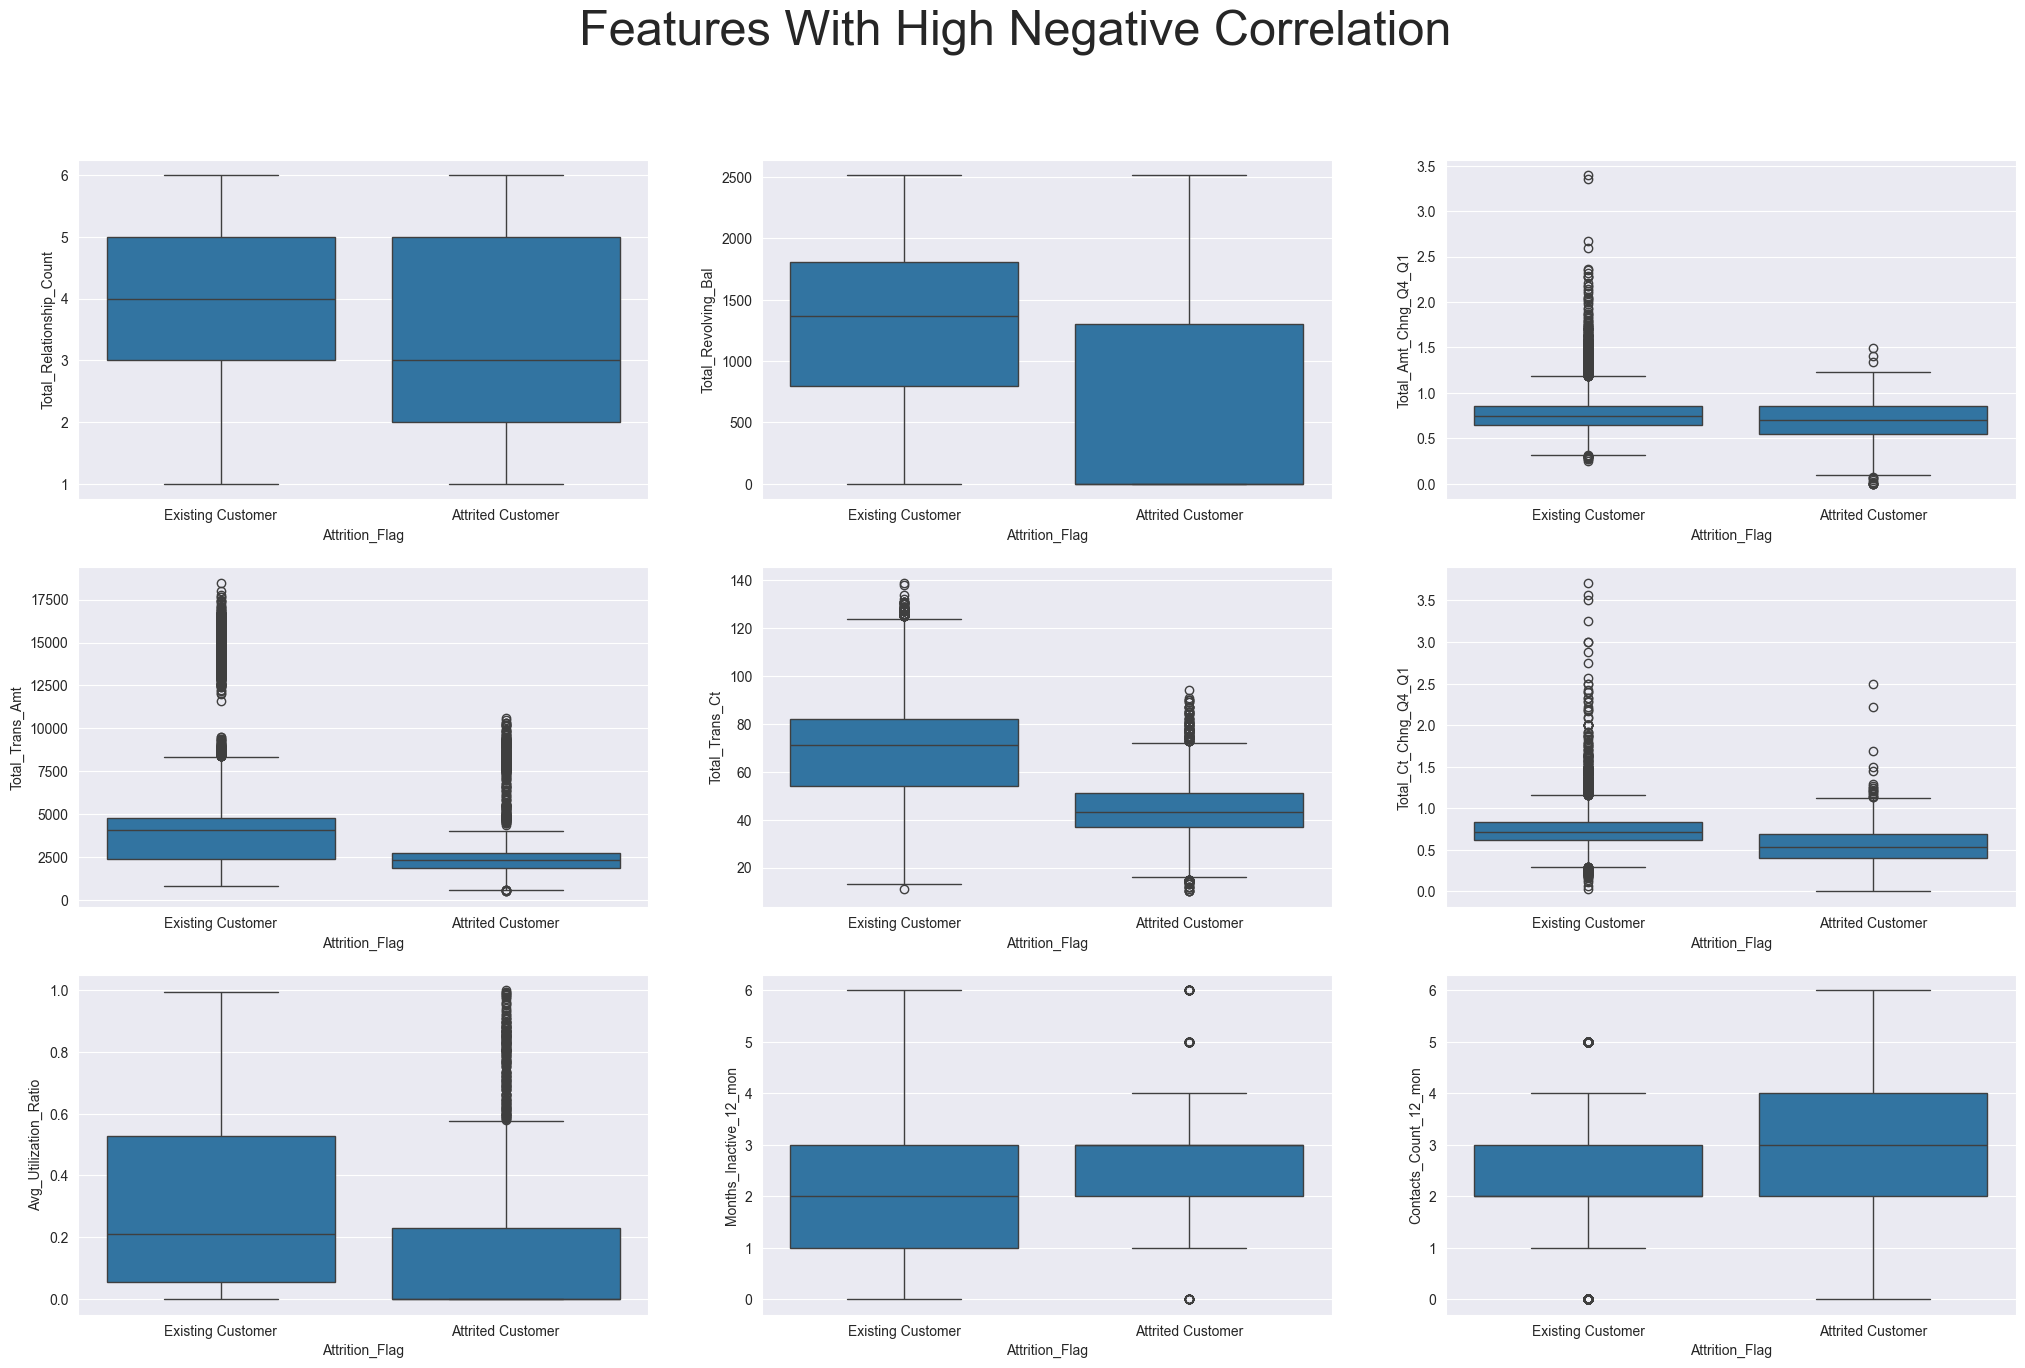

In [111]:
#visualizing the features whigh positive and negative correlation
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))

f.suptitle('Features With High Negative Correlation', size=35)

sns.boxplot(x="Attrition_Flag", y="Total_Relationship_Count", data=df, ax=axes[0,0])
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=df, ax=axes[0,1])
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=df, ax=axes[0,2])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=df, ax=axes[1,0])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=df, ax=axes[1,1])
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", data=df, ax=axes[1,2])
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=df, ax=axes[2,0])
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon", data=df, ax=axes[2,1])
sns.boxplot(x="Attrition_Flag", y="Contacts_Count_12_mon", data=df, ax=axes[2,2])

plt.show()

plt.show()

With the wide variety of data, we can see specfic relationships such as churned customers tend to have lower transaction volumes; this finding would align with the hypotheses that churned customers have different spending behaviour.

The findings suggest that churned customers have higher credit utilisation and lower transaction volumes, which supports the idea that credit utilisation and transaction volume are strong indicators of churn risk.

The findings also suggest that fewer transactions/relationships correlate with a higher likelihood of churn which basically means that customers with lower transaction activity are more likely to churn as the churned customers are less engaged as shown on the boxplots.

Remaining data for column Customer_Age: 10127 rows
Remaining data for column Dependent_count: 10127 rows
Remaining data for column Months_on_book: 10127 rows
Remaining data for column Total_Relationship_Count: 10127 rows
Remaining data for column Months_Inactive_12_mon: 10127 rows
Remaining data for column Contacts_Count_12_mon: 10127 rows
Remaining data for column Credit_Limit: 10127 rows
Remaining data for column Total_Revolving_Bal: 10127 rows
Remaining data for column Avg_Open_To_Buy: 10127 rows
Remaining data for column Total_Amt_Chng_Q4_Q1: 10127 rows
Remaining data for column Total_Trans_Amt: 10127 rows
Remaining data for column Total_Trans_Ct: 10127 rows
Remaining data for column Total_Ct_Chng_Q4_Q1: 10127 rows
Remaining data for column Avg_Utilization_Ratio: 10127 rows
Remaining data for column Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: 10127 rows
Remaining data for column Naive_Bayes_Clas

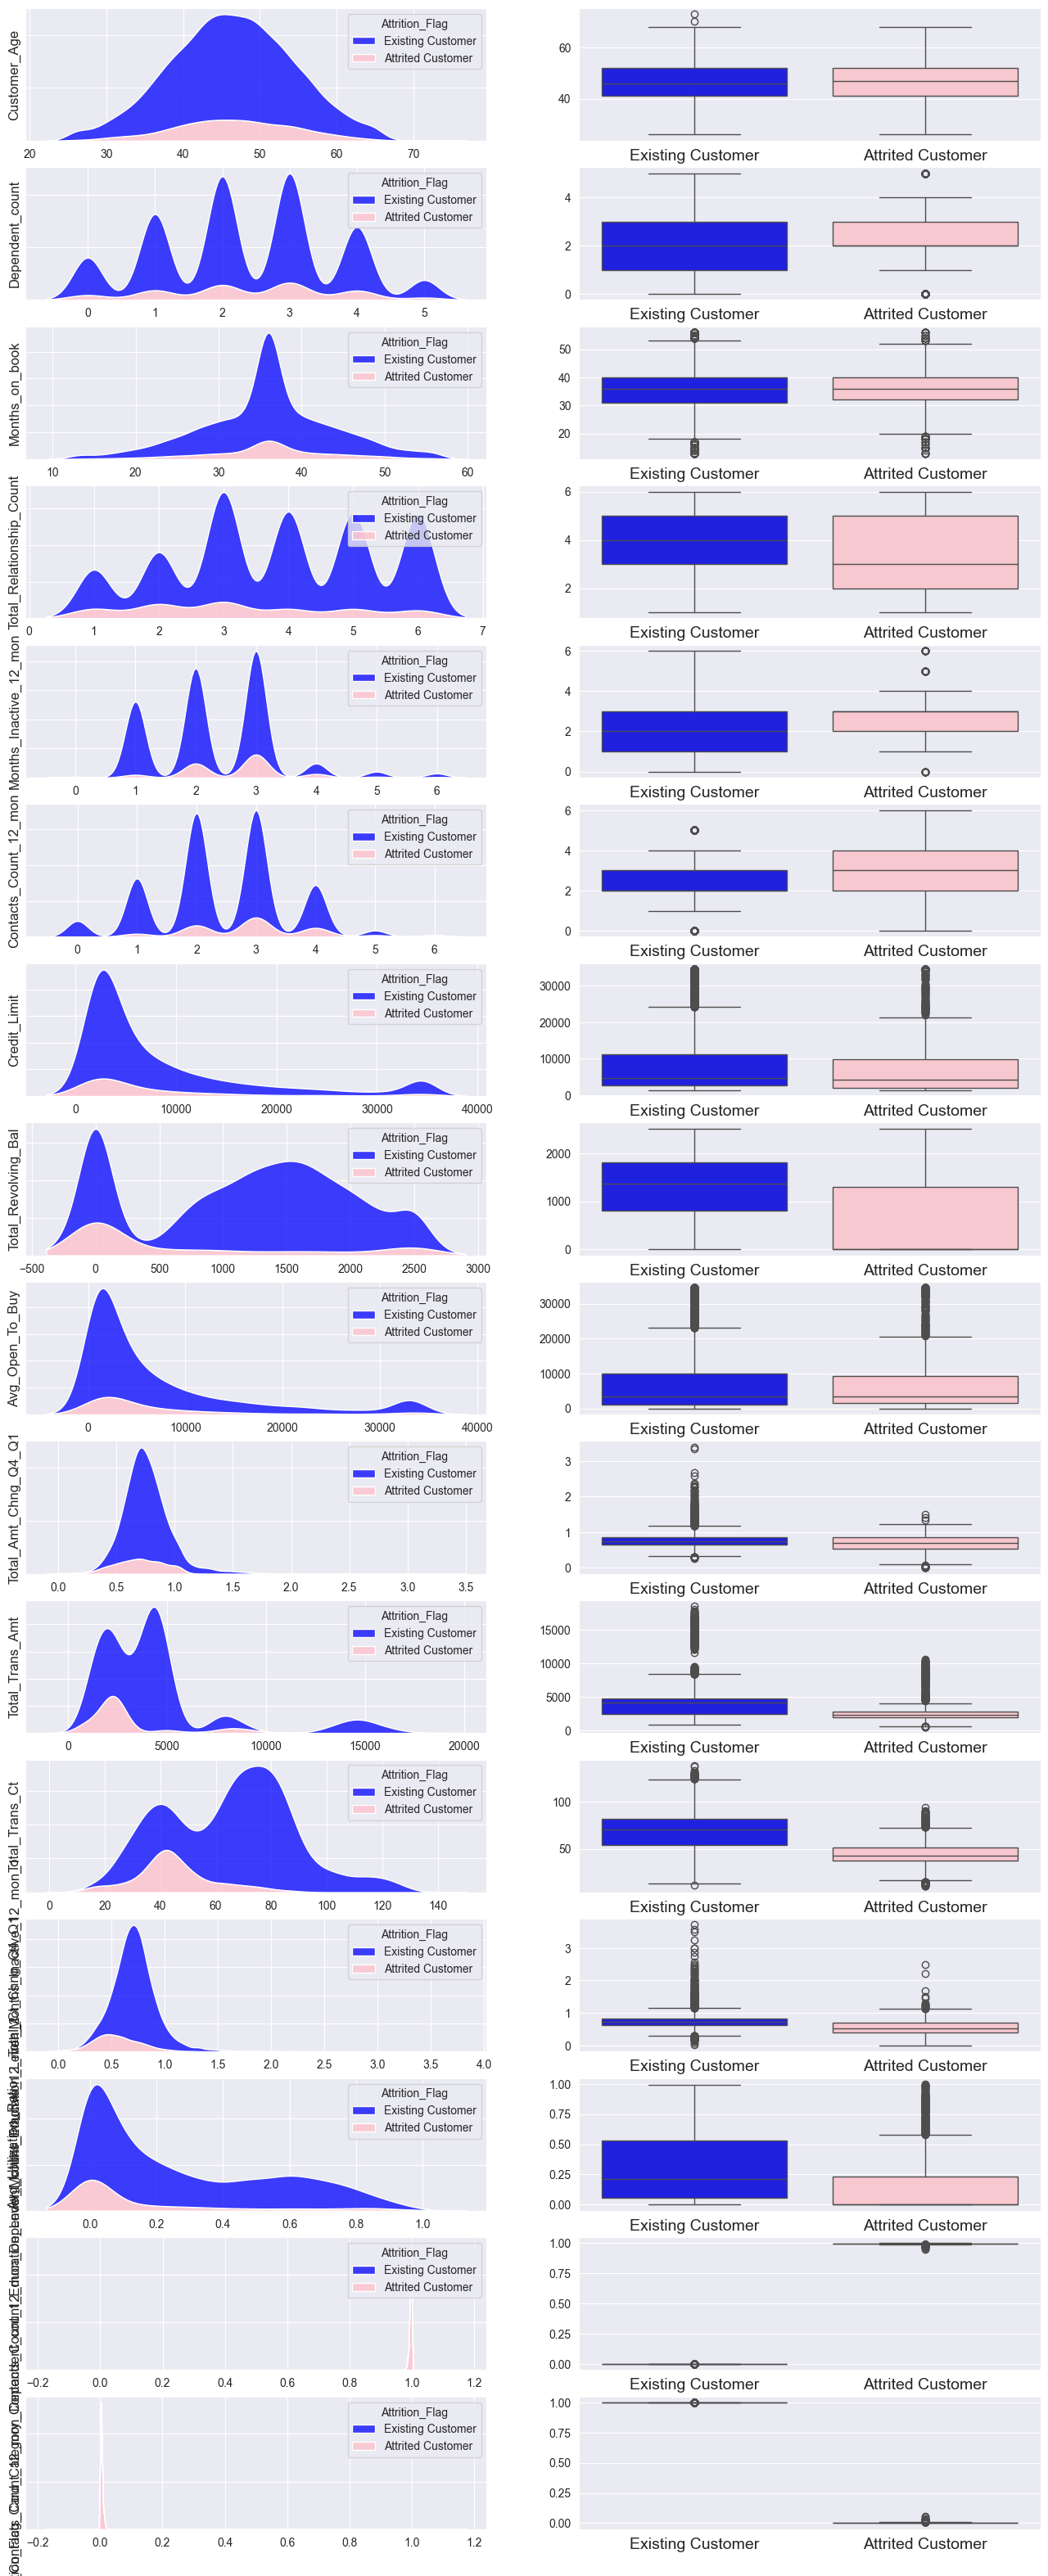

In [112]:
# Assuming df is already loaded with data
num_cols = list(df.select_dtypes(["int64", "float64"]))

fig, ax = plt.subplots(ncols=2, nrows=len(num_cols)-1, figsize=(16, 40))

i = 0  # counter
for cols in num_cols[1:]:
    # Filter out NaN values from relevant columns (without removing outliers)
    filtered_df = df.dropna(subset=[cols, 'Attrition_Flag'])

    #print(filtered_df.head())
    
    # Check how many rows are left after filtering
    print(f"Remaining data for column {cols}: {filtered_df.shape[0]} rows")
    
    # Check if there are enough unique values in 'Attrition_Flag'
    if filtered_df['Attrition_Flag'].nunique() < 2:
        print(f"Skipping column {cols} because 'Attrition_Flag' has fewer than 2 unique values.")
        continue
    
    # KDE Plot
    sns.kdeplot(data=filtered_df, x=cols, fill=True, hue="Attrition_Flag", palette=('blue', 'pink'), multiple='stack', ax=ax[i, 0])
    
    # Box Plot
    sns.boxplot(data=filtered_df, y=cols, x='Attrition_Flag', ax=ax[i, 1], hue="Attrition_Flag",  palette=('blue', 'pink'))

    # Customizing plot aesthetics
    ax[i, 0].set_xlabel(' ')
    ax[i, 1].set_xlabel(' ')
    ax[i, 1].set_ylabel(' ')
    ax[i, 1].xaxis.set_tick_params(labelsize=14)
    ax[i, 0].tick_params(labelleft=False, left=False)  # Reordered the arguments
    ax[i, 0].set_ylabel(cols, fontsize=12)
    
    i += 1

plt.show()

We can conclude from this data that customers with lower transaction activity tend to churn more frequently as shown in the KDE plot; and this supports the hypotheses that low transaction activity leads to higher churn risk.

The evidence above can suggest that some churned customers have high credit balances but still churn, and this would suggest that financial anomalies do exist which challenges the hypotheses that higher income customers always have higher credit limits.

We can also compare the distrubutions of various features between churned and non-churned customers, as the KDE plot provides additional evidence that customers with lower financial engagement and or unstable transactional behaviour are more likely to churn.

---

# Conclusion and Next Steps

For our conclusion, we will summarize our key findings which would be that churned customers exhibit lower engagement and spending. The churn distrubution plot showed that only a small portion of customers have churned indicating strong retention but highlighting a potential revenue risk. Our next steps if we were to continue would be to, implement early warnings to flag for customers whose spending drops below a specific threshold as this could reduce the amount of churned customers.

Another key finding was that churned customers use less of their credit limit, compared to our initial assumptions, the violin plot proved that churned customers use less of their credit limits and not more. If we were to continue, our next steps would be to identify low utilisation customers early and to encourage activity through exclusive offers to increase revenue.

Another key finding was that credit limit itself does not strongly predict churn, as even though the box plot showed that higher income customers have higher credit limits, the heatmap revealed that credit limit has no strong correlation with churn or transaction behaviour. If we were to continue, our next steps for this would be not to use credit limit as a primary churn predictor.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [113]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)